In [2]:
using LinearAlgebra
using NLsolve
using OrdinaryDiffEq
using Plots

In [3]:

debug = false;
const D = 4
include("flux-and-jacobian-functions.jl")
include("inversion.jl")
include("flux-functions.jl")
include("initial-data.jl")
include("choques_utils.jl")
include("auxfunctions.jl")
include("parameters_creator.jl")#Load important packages

parameters_creator (generic function with 1 method)

## Christoffel Symbols

We have the equations

\begin{equation}
    \begin{matrix}
        \nabla_{a}T^{ab}&=&0\\
        \nabla_{a}A^{abc}&=&I^{bc}
    \end{matrix}
\end{equation}

We can rewrite this as

\begin{equation}
    \begin{matrix}
        \partial_{a}T^{ab} + \Gamma^{b}_{ad}T^{ad} + \Gamma^{a}_{ad}T^{db}&=&0\\
        \partial_{a}A^{abc} + \Gamma^{a}_{ad}A^{dbc} + \Gamma^{b}_{ad}A^{adc} + \Gamma^{c}_{ad}A^{abd} &=&I^{bc}
    \end{matrix}
\end{equation}

For example

\begin{equation}
    \begin{matrix}
        \partial_{t}T^{t0} + \Gamma^{0}_{td}T^{td} + \Gamma^{t}_{td}T^{d0} =\\ - (\partial_{x}T^{x0} + \Gamma^{0}_{xd}T^{xd} + \Gamma^{x}_{xd}T^{d0} + \partial_{z}T^{z0} + \Gamma^{0}_{zd}T^{zd} + \Gamma^{z}_{zd}T^{d0})
    \end{matrix}
\end{equation}



In [5]:
#initial_data_type = :constant_mu
initial_data_type = :chichon_3D
#Grid parameters
N_out = 40
M_out = 40
O_out = 40
const N_Fields_out = 14
Lx_out = 20.0
Ly_out = 20.0
Lz_out = 20.0

lengthpars_out = (Lx_out, Ly_out, Lz_out, N_out, M_out, O_out, N_Fields_out)

(20.0, 20.0, 20.0, 40, 40, 40, 14)

In [6]:
get_pos(N_out+3,N_out/2+4,N_out+3, lengthpars_out)

(10.0, 0.2564102564102573, 10.0)

In [7]:
println("hola")

hola


In [8]:
#initial data vector
initial_data = ones(N_out+6,M_out+6, O_out+6,2*N_Fields_out);


C0_out = 1
C1_out = 10
C2_out = 100

χ_out = (0.0, 1.0)
C_out = (C0_out, C1_out, C2_out)

tol_out = 1e-15
iter_max_out = 10

Mass = 0.0
a = 0.0
println("hola")

par_inidat, par_source, par_flux, par_inv, par_ev = parameters_creator(χ_out, C_out, lengthpars_out, tol_out, iter_max_out, Mass, a)

gtable = par_inv[end];
Γtable = par_source[end];


hola
creating metric
metric created
creating christoffels
christoffels created
I am in parameters creator
hello!
I get here!


In [9]:
include("initial-data.jl")

create_initial_data (generic function with 1 method)

In [10]:
include("metric-creator.jl")
include("initial-data.jl")
println("Starting Dissipative Run...")
#initial_data_type = :constant_mu
dx = Lx_out/N_out
dt = dx*0.1

tf = 20
initial_data_type = :chichon_3D
create_initial_data(initial_data_type, initial_data, par_inidat)
println("initialized.")

Starting Dissipative Run...
Lx = 20.0, Ly = 20.0, Lz = 20.0
Initializing data...
closing initialization function...
initialized.


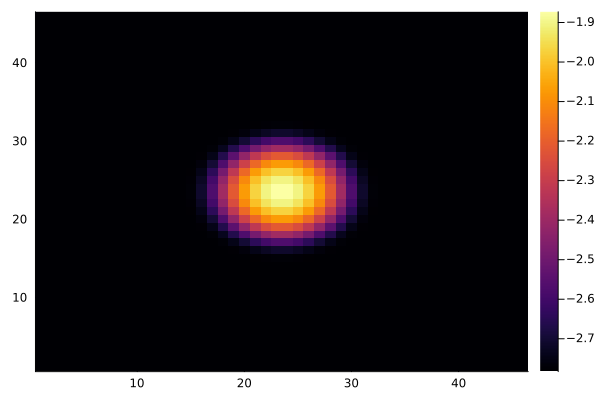

In [12]:
heatmap(initial_data[:,:,23,15])

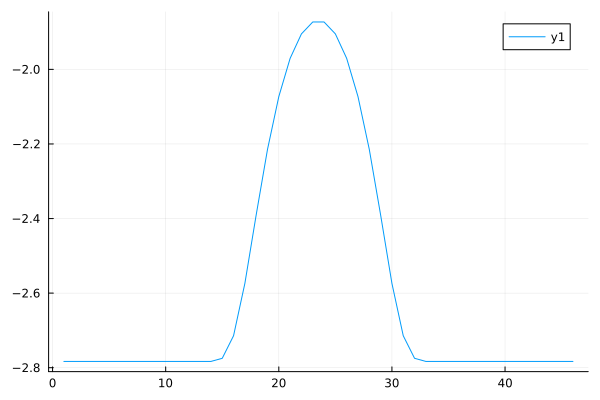

In [13]:
plot(initial_data[:,23,23,15])

In [14]:
#= wrong dimensions
Adummy = zeros(4,4,4)
Tdummy = zeros(4,4)
A122 = copy(initial_data[:,:,:,1])
for i in 1:N_out+6
    for j in 1:M_out+6
        con_abs = @view initial_data[i,j,:]
        TandA!(Tdummy, Adummy, con_abs, i, j, 3, par_flux)
        A122[i,j] = Adummy[2,3,3]
    end
end
=#

In [15]:
heatmap(A122)

UndefVarError: UndefVarError: `A122` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [16]:
initial_data[5,6,4,1]

0.10000000000000003

In [17]:
par_source

(1, 10, 100, [-1.0 -1.0 … -1.0 -1.0; -1.0 -1.0 … -1.0 -1.0; … ; -1.0 -1.0 … -1.0 -1.0; -1.0 -1.0 … -1.0 -1.0;;; -1.0 -1.0 … -1.0 -1.0; -1.0 -1.0 … -1.0 -1.0; … ; -1.0 -1.0 … -1.0 -1.0; -1.0 -1.0 … -1.0 -1.0;;; -1.0 -1.0 … -1.0 -1.0; -1.0 -1.0 … -1.0 -1.0; … ; -1.0 -1.0 … -1.0 -1.0; -1.0 -1.0 … -1.0 -1.0;;; … ;;; -1.0 -1.0 … -1.0 -1.0; -1.0 -1.0 … -1.0 -1.0; … ; -1.0 -1.0 … -1.0 -1.0; -1.0 -1.0 … -1.0 -1.0;;; -1.0 -1.0 … -1.0 -1.0; -1.0 -1.0 … -1.0 -1.0; … ; -1.0 -1.0 … -1.0 -1.0; -1.0 -1.0 … -1.0 -1.0;;; -1.0 -1.0 … -1.0 -1.0; -1.0 -1.0 … -1.0 -1.0; … ; -1.0 -1.0 … -1.0 -1.0; -1.0 -1.0 … -1.0 -1.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0

In [18]:
println("hola")

hola


In [19]:
include("flux-functions.jl")
include("choques_utils.jl")
include("inversion.jl")

c2abs! (generic function with 1 method)

In [20]:
du_test = copy(initial_data)
evolution!(du_test,initial_data,(par_inv, par_ev, lengthpars_out),0.2)

2725408-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [21]:
Fdummy = zeros(28)
u_dummy = rand(28)



28-element Vector{Float64}:
 0.852035601472006
 0.24769797517279712
 0.225303058610006
 0.7487841495165525
 0.8306565818613617
 0.18457094480739022
 0.6583124387102344
 0.49944052045491005
 0.42044444520508195
 0.7786900497857728
 ⋮
 0.7244382937372222
 0.2739135334403626
 0.38348913556161357
 0.6676034613892138
 0.33287871353402565
 0.3889895711549881
 0.7773124709562886
 0.30274578970522914
 0.055157282205753

In [22]:
Fx!(Fdummy, u_dummy, 4, 8, 9, par_flux)[12]

568.996882741491

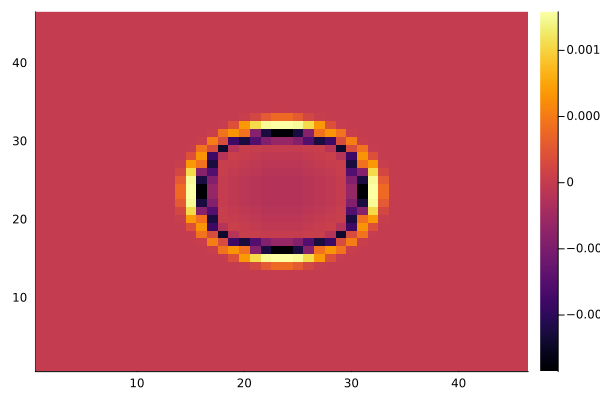

In [23]:
heatmap(du_test[23,:,:,1])

In [24]:
plot(du_test[10:end,20,12])

BoundsError: BoundsError: attempt to access 46×46×46×28 Array{Float64, 4} at index [10:46, 20, 12]

In [25]:
heatmap(du_test[:,:,10])

BoundsError: BoundsError: attempt to access 46×46×46×28 Array{Float64, 4} at index [1:46, 1:46, 10]

In [26]:
plot(initial_data[:,28,2])

BoundsError: BoundsError: attempt to access 46×46×46×28 Array{Float64, 4} at index [1:46, 28, 2]

In [ ]:
du_test = copy(initial_data)
eutest = copy(initial_data)
dt = 0.1*dx
for i in 1:2
    evolution!(du_test,eutest,(par_inv, par_ev, lengthpars_out),0.2)
    eutest .= du_test * dt .+ eutest
end

UndefVarError: UndefVarError: `evolution_axisymmetric!` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [28]:
plt = plot(xlist[3:N_out-3], eutest[3:N_out-3,28,1])
vline!([2,1])

UndefVarError: UndefVarError: `xlist` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [29]:
zlist = []
for i in 1:6+M_out
    x, z = get_pos(i,4,lengthpars_out)
    push!(zlist, x)
end
plot(zlist, initial_data[:,28,1])
vline!([2,-2])

MethodError: MethodError: no method matching get_pos(::Int64, ::Int64, ::Tuple{Float64, Float64, Float64, Vararg{Int64, 4}})
The function `get_pos` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  get_pos(::Any, ::Any, ::Any, !Matched::Any)
   @ Main ~/Documentos/Programas/Julia/conformal-3D/metric-creator.jl:3


In [30]:
zlist

Any[]

In [31]:
include("choques_utils.jl")

evolution! (generic function with 1 method)

In [32]:
tf = 1.0
prob = ODEProblem(evolution!, initial_data, (0.0,tf), (par_inv, par_ev,lengthpars_out));
println("Starting to solve...")
dt = 0.1*dx
sol = solve(prob,SSPRK33(),dt=dt,saveat=0.01*tf);
println("solved")

Starting to solve...
solved


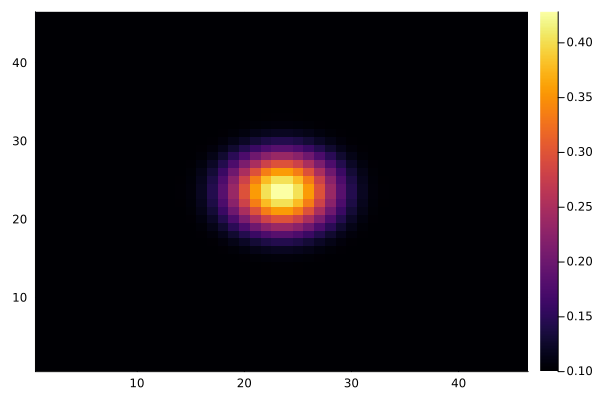

In [33]:
heatmap(sol.u[100][:,:,23,1])

In [ ]:
anim = @animate for u in sol.u
    heatmap(u[:,:,23,1], clims = (0.0,0.5))
end

Animation("/tmp/jl_M8wjIN", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png", "000101.png"])

┌ Info: Saved animation to /tmp/jl_o5khkfUpoF.gif
└ @ Plots /home/pablo/.julia/packages/Plots/Ec1L1/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_o5khkfUpoF.gif")
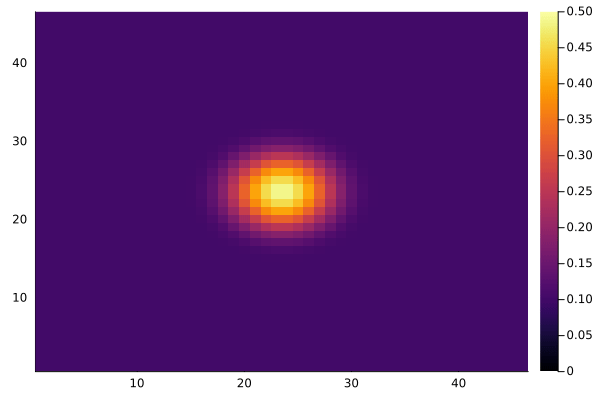

In [37]:
gif(anim)

In [38]:
anim = @animate for u in sol.u
    plot(u[:,23,23,1], ylims = (0,0.5))
end

Animation("/tmp/jl_5CyRaq", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png", "000101.png"])

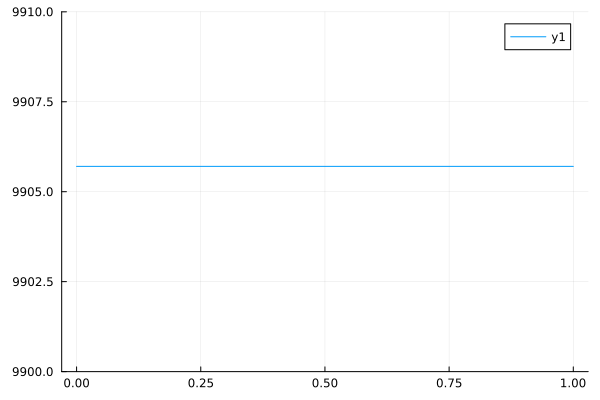

In [47]:
plt = plot()
intlist = []
for t in sol.t
    append!(intlist, sum(sol(t)[:,:,:,1]))
end
plot(sol.t, intlist, ylims = (9.9E3, 9.91E3))

In [43]:
sol.t

101-element Vector{Float64}:
 0.0
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 ⋮
 0.92
 0.93
 0.94
 0.95
 0.96
 0.97
 0.98
 0.99
 1.0

┌ Info: Saved animation to /tmp/jl_wTy1MxyXEZ.gif
└ @ Plots /home/pablo/.julia/packages/Plots/Ec1L1/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_wTy1MxyXEZ.gif")
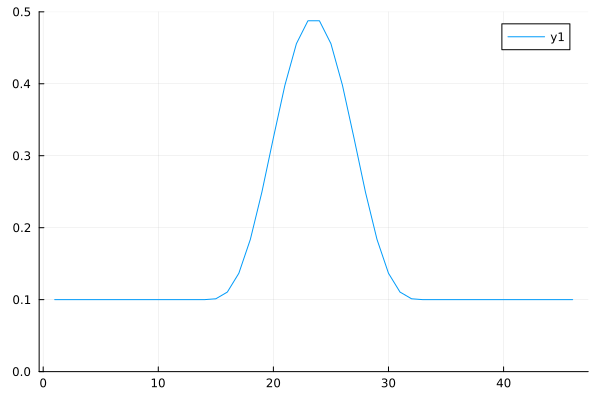

In [ ]:
gif(anim)

In [35]:
dx = Lx_out/N_out
dy = Ly_out/M_out

xlist = [-Lx_out/2 + dx*i for i in 1:N_out]
ylist = [dy*i for i in 1:M_out]

40-element Vector{Float64}:
  0.5
  1.0
  1.5
  2.0
  2.5
  3.0
  3.5
  4.0
  4.5
  5.0
  ⋮
 16.0
 16.5
 17.0
 17.5
 18.0
 18.5
 19.0
 19.5
 20.0

In [36]:
anim = @animate for u in sol.u
    heatmap(xlist, ylist, u[4:end-3,4:end-3,1]./sqrtg[4:end-3,4:end-3], cmap = :plasma, xlabel = "\$x\$", ylabel = "\$y\$")
    title!("Energía")
end

UndefVarError: UndefVarError: `sol` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [37]:
gif(anim, "Test_energy.gif")

UndefVarError: UndefVarError: `anim` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [38]:
anim2 = @animate for u in sol.u
    heatmap(xlist, ylist, u[4:end-3,4:end-3,16], cmap = :plasma, xlabel = "\$x\$", ylabel = "\$y\$")
    title!("\$v_2\$")
end

UndefVarError: UndefVarError: `sol` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [ ]:
gif(anim2, "Test_v_r.gif")

In [ ]:
plt = heatmap(xlist, ylist, sol.u[end][4:end-3,4:end-3,1], cmap = :plasma, xlabel = "\$x\$", ylabel = "\$y\$")
title!("Energía")
savefig(plt, "T002D-2.png")

In [ ]:
plt2 = heatmap(xlist, ylist, sol.u[end][4:end-3,4:end-3,5], cmap = :plasma, xlabel = "\$x\$", ylabel = "\$y\$")
title!("\$A_{000}\$")
savefig(plt2, "A0002D-2.png")

In [ ]:
using JLD2

In [ ]:


C0_out = 100
C1_out = 10
C2_out = 10

χ_out = (1.0, 1.0)
@save "test_solution-2.jld2" sol

In [ ]:
ξ_ab = zeros(4,4)
ξᵃ = zeros(4)
lᵃ = zeros(4)
gᵃᵇ = Diagonal([-1,1,1,1])
ξᵃᵇ = copy(ξ_ab)
τᵃᵇ = copy(ξ_ab)

In [ ]:
k = 4;
νmap = zeros(N_out+6, M_out+6)

anim3 = @animate for u in sol.u
    for i in 1:N_out+6
        for j in 1:M_out+6
            ξ_a = @view u[i,j,15:18]
            ξ_ab_vec = @view u[i,j,19:end]


            ξ_ab_fun!(ξ_ab_vec, ξ_ab)

            #Vectors
            rise_index!(ξᵃ, gᵃᵇ, ξ_a)
            ξᵃᵇ_fun!(ξᵃᵇ, gᵃᵇ, ξ_ab)
            mul!(lᵃ, ξᵃᵇ, ξ_a)
            #Scalars
            μ = ξᵃ'ξ_a
            ν = lᵃ'ξ_a
            νmap[i,j] = ν
            #Tensors
            #τᵃᵇ_fun!(τᵃᵇ, μ, ν, ξᵃ, lᵃ, ξᵃᵇ, gᵃᵇ)
            

        end
    end
    heatmap(xlist, ylist, νmap[4:end-3,4:end-3], cmap = :plasma, xlabel = "\$x\$", ylabel = "\$y\$")
    title!("\$ ν \$")
end
gif(anim3)